In [8]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

In [9]:
#для визуализации данных, а не обучения, лучше подойдет необработанный датасет
pokemon_df = pd.read_csv('../data/pokemon.csv')
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Построим график зависимости HP от Total силы покемона. По оси x - HP, по оси y - среднее значение Total всех покемонов.

<AxesSubplot:xlabel='HP'>

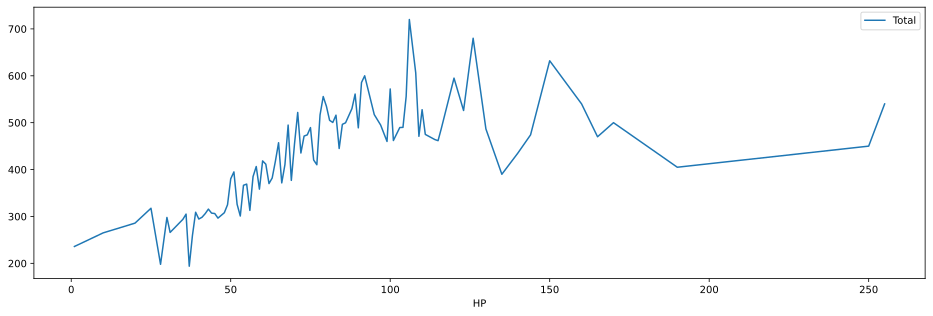

In [10]:
HP_df = pokemon_df[['Total'] + ['HP']]
HP_df.groupby('HP').mean().plot()

График игольчатый, что не очень хорошо, однако до 100 HP можно увидеть тенденцию, что в общем случае чем больше HP, тем больше Total сила покемона, со своими исключениями, выраженными на графике "игольчатыми выбросами".
То есть мы можем однозначно сказать, что средняя сила у покемонов с 100 очками здоровья явно больше, чем средняя сила у покемонов с 50 очками здоровья. Теперь отобразим через метод pairplot зависимости между базовыми характеристиками покемона и некоторыми типами.

In [11]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
sns_plot = sns.pairplot(pokemon_df[cols])

Из этого можно заметить, например, что редко какие покемоны имеют больше 100 HP и меньше 25 HP. Это объясняет первый график HP от Total, после отметки в 100 на оси HP и до отметки 25 на оси HP, график более свободный. 

x:\programs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

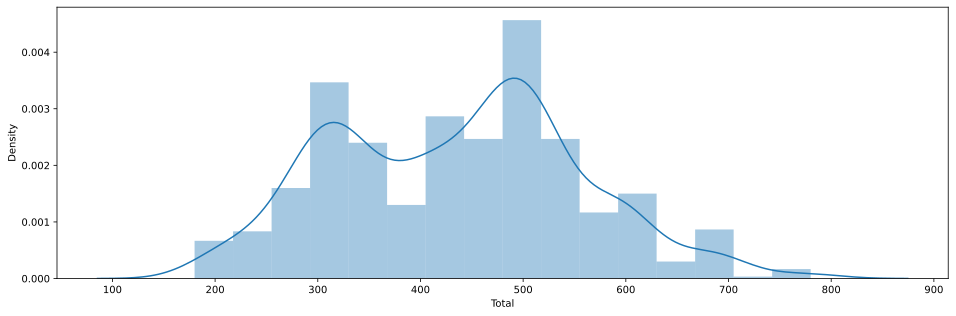

In [12]:
sns.distplot(pokemon_df.Total)

По этой гистограмме можно заметить, что покемонов с Total, равным 500, больше примерно в три раза по сравнению с количеством покемонов, у которых Total меньше 250.

<AxesSubplot:xlabel='Speed', ylabel='Type 1'>

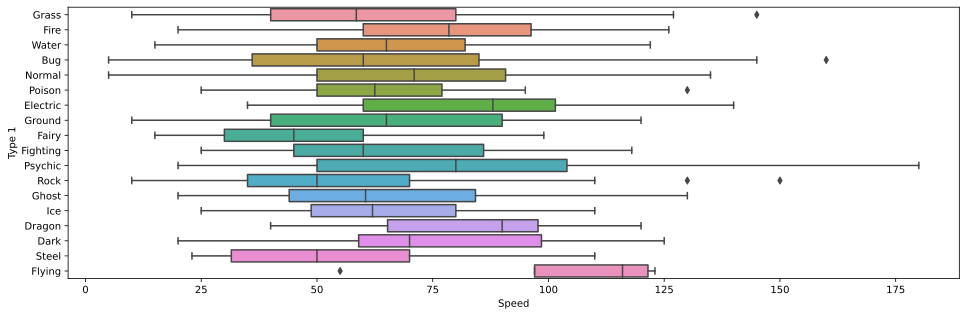

In [13]:
types = pokemon_df['Type 1'].value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="Type 1", x="Speed", data=pokemon_df[pokemon_df['Type 1'].isin(types)], orient="h")

Из этих данных сильно выбивается тип "Flying" - он явно является лучшим типом, если это касается скорости покемонов. В то же время у типа "Fairy" явные проблемы со скоростью.

<AxesSubplot:xlabel='Generation', ylabel='Type 1'>

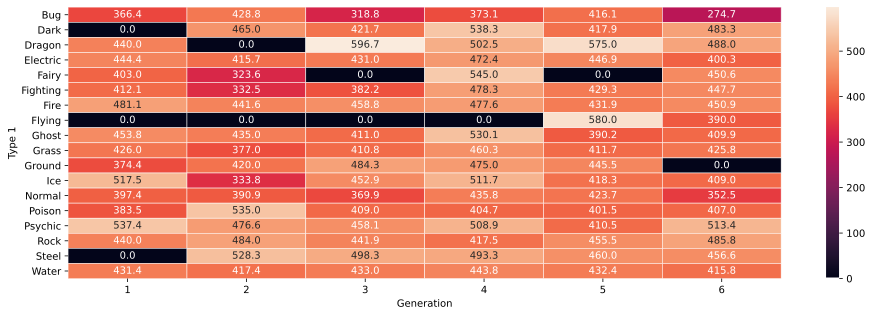

In [14]:
type_gen_total = pokemon_df.pivot_table(
                        index='Type 1', 
                        columns='Generation', 
                        values='Total', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(type_gen_total, annot=True, fmt=".1f", linewidths=.5)

По данной heat map можно заметить, что столбец, соответствующий 4 поколению оказался светлее, а значит оно в среднем сильнее, чем остальные поколения. Так же интересно то, что тип Dragon имеет достаточно высокие характеристики, он очевидно в среднем по показателям лучше, чем остальные типы покемонов. По некоторым ячейкам можно понять, что в некоторых поколениях некоторые типы отсутствуют вовсе. Например тип "Flying" присутствует только в 5-6 поколениях.